# Calculating $\Sigma_{10}$, $\Sigma_{10, \rm flux\ selected}$, $\Sigma_{20}$, $\Sigma_{20, \rm flux\ selected}$ for DESIJ1205+4110

**Author(s)**: Zareef Jafar, Muhammad Jobair Hasan, Anowar Shajib

## Import Libraries

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.stats import SigmaClip
from astropy.visualization import simple_norm
from astropy.wcs import WCS
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import (
    SourceCatalog,
    SourceFinder,
    deblend_sources,
    detect_sources,
)

## Load Data

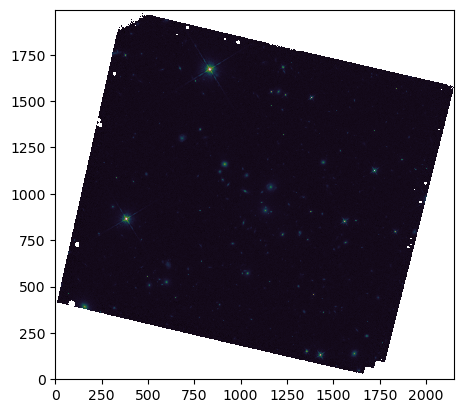

In [88]:
data, header = fits.getdata("DESIJ1554+0443_F140W_drz_sci.fits", header=True)
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

## Background estimation

/tmp/ipykernel_25431/3998831433.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


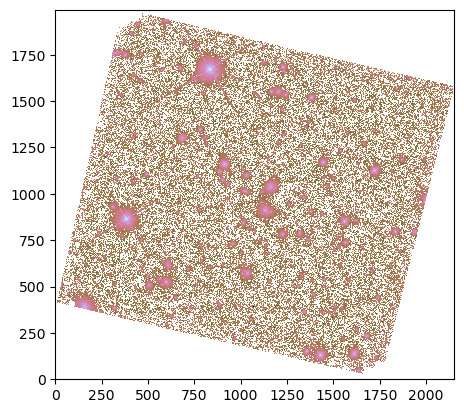

In [89]:
sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(
    data,
    (50, 50),
    filter_size=(3, 3),
    sigma_clip=sigma_clip,
    bkg_estimator=bkg_estimator,
)

plt.imshow(
    np.log10(data - bkg.background),
    origin="lower",
    cmap="cubehelix",
    interpolation="nearest",
)

## Aperture Photometry and Plotting

In [90]:
# Background subtraction
bkg_subtracted_data = data - bkg.background
# Source detection and segmentation
threshold = 3 * bkg.background_rms
segment_map = detect_sources(bkg_subtracted_data, threshold, npixels=10)
segm_deblend = deblend_sources(
    bkg_subtracted_data,
    segment_map,
    npixels=10,
    nlevels=32,
    contrast=0.001,
    progress_bar=False,
)
# Source catalog creation
finder = SourceFinder(npixels=10, progress_bar=False)
segment_map = finder(bkg_subtracted_data, threshold)

cat = SourceCatalog(bkg_subtracted_data, segm_deblend)
print("SEGMENT MAP:\n", segment_map, "\n\nCAT:\n", cat)

SEGMENT MAP:
 <photutils.segmentation.core.SegmentationImage>
shape: (1994, 2152)
nlabels: 862
labels: [  1   2   3   4   5 ... 858 859 860 861 862] 

CAT:
 <photutils.segmentation.catalog.SourceCatalog>
Length: 862
labels: [  1   2   3   4   5 ... 858 859 860 861 862]


## Adjust the region surrounding your lensing system

In [91]:
# Set axis limits
set_x_lim1, set_x_lim2 = 997 - 150, 997 + 500
set_y_lim1, set_y_lim2 = 1076 - 310, 1076 + 250

/tmp/ipykernel_25431/3636062044.py:6: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


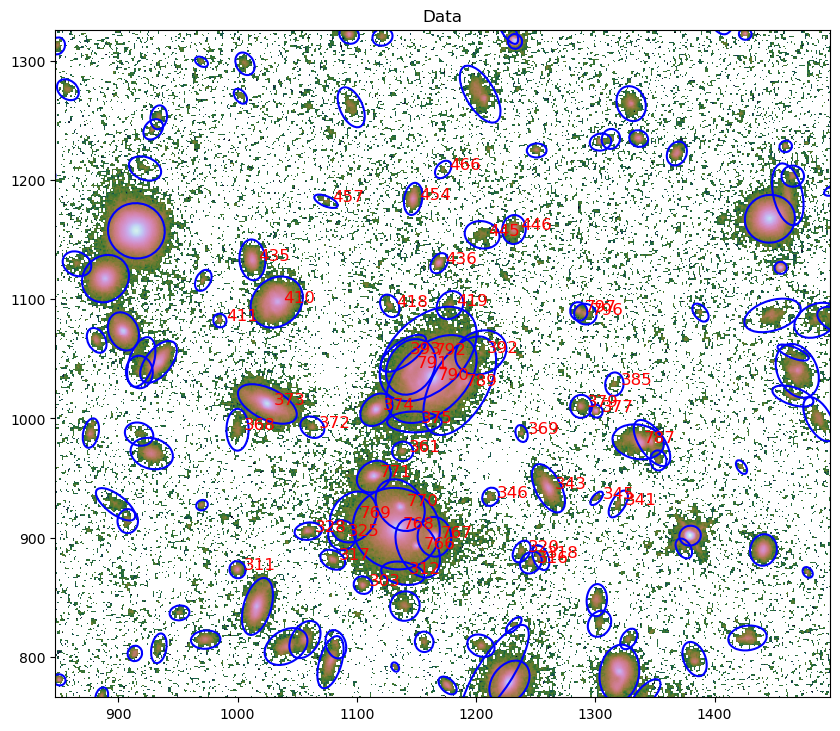

In [92]:
# Plotting
norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

cat.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)
# Before determining the central ID
# for i in range(len(cat)):
#     ax1.text(
#         cat.xcentroid[i] + 5,
#         cat.ycentroid[i],
#         f"{i}",
#         c="r",
#         fontsize=12
#     )

# After determining the central ID
id_central = 790
for i in range(len(cat)):
    if np.abs(cat.xcentroid[i] - cat.xcentroid[id_central]) < 180 and np.abs(cat.ycentroid[i] - cat.ycentroid[id_central]) < 180:
      ax1.text(
          cat.xcentroid[i] + 5,
          cat.ycentroid[i],
          f"{i}",
          c="r",
          fontsize=12
      )


ax1.set_xlim(set_x_lim1, set_x_lim2)
ax1.set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

## The central deflector

/tmp/ipykernel_25431/1229531880.py:8: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2


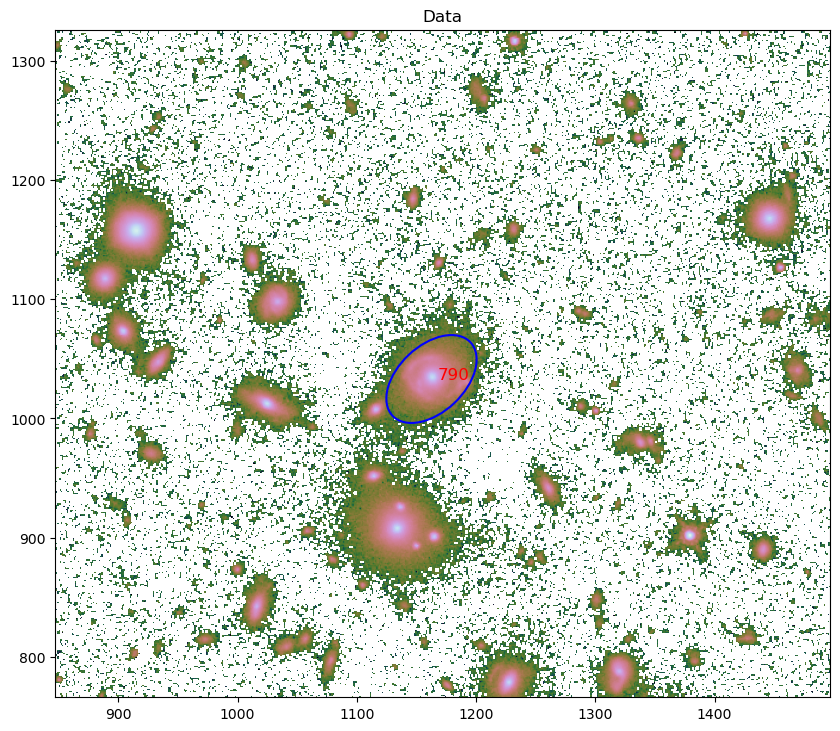

In [93]:
# object id of your central deflector/lens
id_central = 790

norm = simple_norm(data, "sqrt")

fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
ax1.imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
ax1.set_title("Data")

labels_1 = [id_central + 1]
cat_subset_1 = cat.get_labels(labels_1)

cat_subset_1.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

ax1.text(
    cat.xcentroid[id_central] + 5,
    cat.ycentroid[id_central],
    f"{id_central}",
    c="r",
    fontsize=12
    # transform=ax1.transAxes
)

ax1.set_xlim(set_x_lim1, set_x_lim2)
ax1.set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
ax1.set_clip_on(True)
ax1.set_clip_box(ax1.bbox)

In [94]:
tbl = cat.to_table()
tbl["xcentroid"].info.format = ".2f"  # optional format
tbl["ycentroid"].info.format = ".2f"
tbl["kron_flux"].info.format = ".2f"

In [95]:
# Defining a function for labeling only selected objects


def label_selected_objects(selected_ids):
    # Background subtraction
    data - bkg.background

    # Plotting
    simple_norm(data, "sqrt")
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 12.5))
    ax1.imshow(
        np.log10(data - bkg.background),
        origin="lower",
        cmap="cubehelix",
        vmin=-4,
        vmax=2,
    )
    ax1.set_title("Selected object(s)")

    # Plot Kron apertures and label selected objects
    for obj_id in selected_ids:
        labels = [obj_id + 1]
        cat_subset = cat.get_labels(labels)
        cat_subset.plot_kron_apertures(ax=ax1, color="blue", lw=1.5)

        ax1.text(
            cat.xcentroid[obj_id] + 5,
            cat.ycentroid[obj_id],
            f"{obj_id}",
            c="r",
            fontsize=12
            # transform=ax1.transAxes
        )

    # Set axis limits
    ax1.set_xlim(set_x_lim1, set_x_lim2)
    ax1.set_ylim(set_y_lim1, set_y_lim2)

    # Hide text outside of the axes
    ax1.set_clip_on(True)
    ax1.set_clip_box(ax1.bbox)

    # Show the plot
    plt.show()


## Creating Lists of neighbouring Galaxies

Number of All Close galaxies within 30 arcseconds radius: 154


/tmp/ipykernel_25431/745140955.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


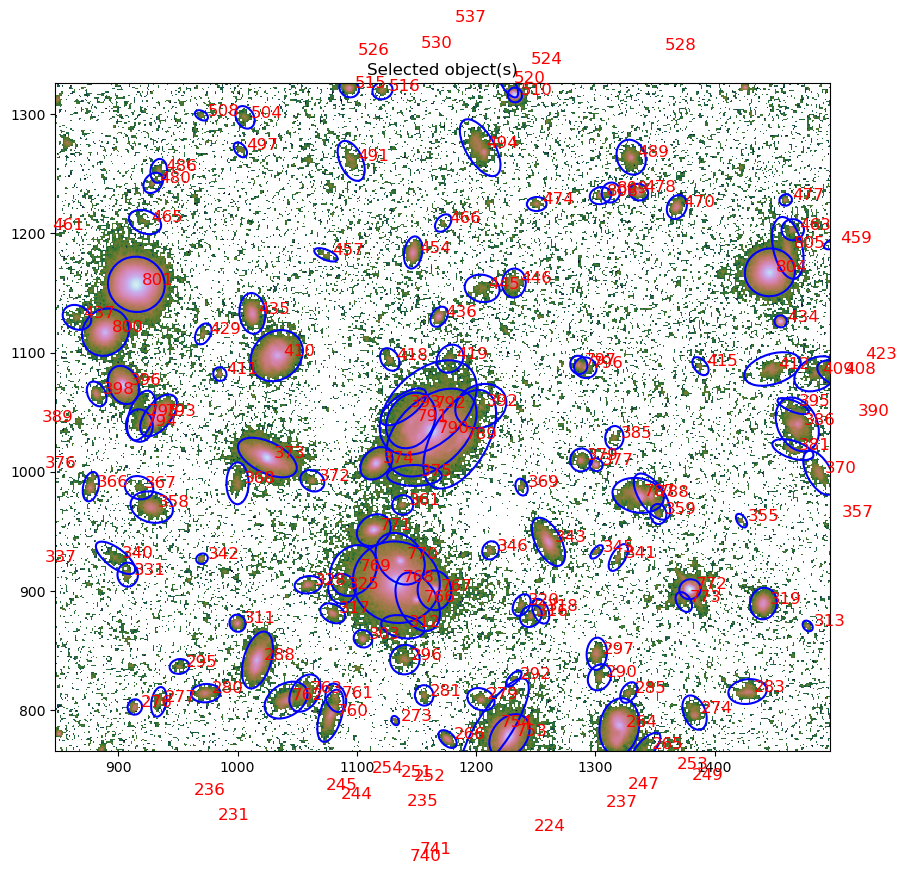

In [96]:
# All close galaxies

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_all = []
dist_galaxies_all = []
flux_galaxies_all = []
axis_ratios_all = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 30 / 0.08:  # radius: 30 arcseconds
        close_galaxies_all.append(i)
        flux_galaxies_all.append(f)
        dist_galaxies_all.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_all.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of All Close galaxies within 30 arcseconds radius:", len(close_galaxies_all)
)
label_selected_objects(close_galaxies_all)

Number of Close galaxies (excluding the dim sources) within 30 arcseconds radius:  72


/tmp/ipykernel_25431/745140955.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


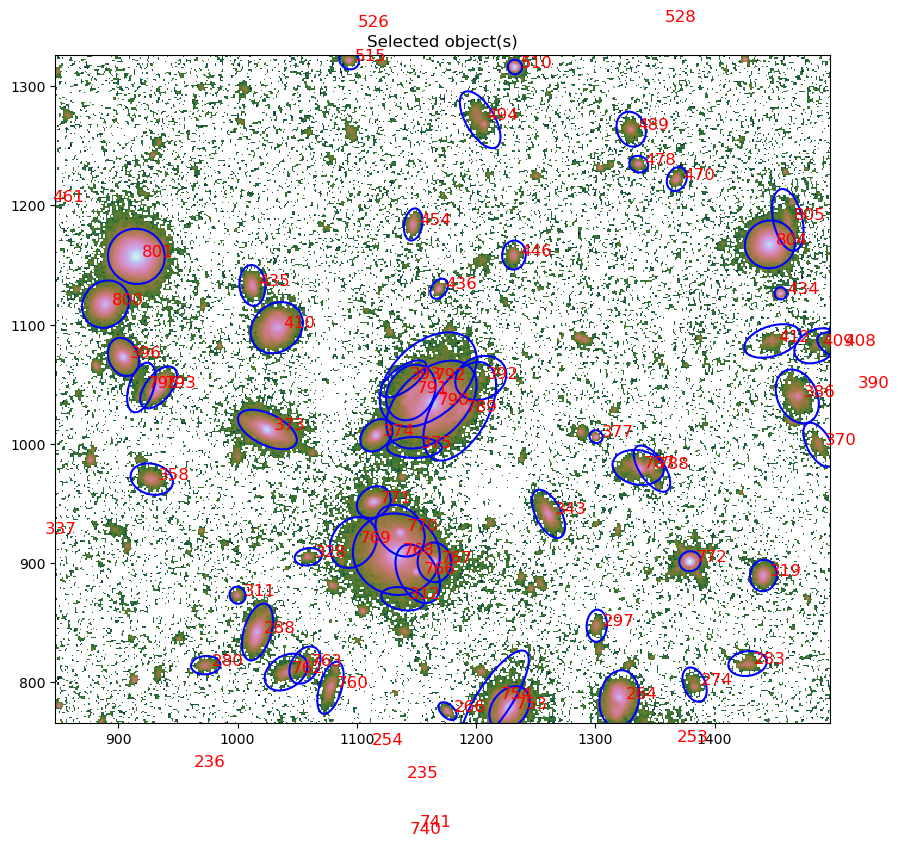

In [97]:
# close galaxies excluding sources lower than 1% of the central deflector

x0 = tbl["xcentroid"].value[id_central]
y0 = tbl["ycentroid"].value[id_central]
f0 = tbl["kron_flux"].value[id_central]

close_galaxies_1 = []
dist_galaxies_1 = []
flux_galaxies_1 = []
axis_ratios_1 = []

for i in range(len(tbl)):
    if i == segment_map.nlabels:
        continue
    x = tbl["xcentroid"].value[i]
    y = tbl["ycentroid"].value[i]
    f = tbl["kron_flux"].value[i]
    if (np.sqrt((x - x0) ** 2 + (y - y0) ** 2) < 30 / 0.08) & (
        f > f0 * 0.01
    ):  # radius: 30 arcseconds
        close_galaxies_1.append(i)
        flux_galaxies_1.append(f)
        dist_galaxies_1.append(np.sqrt((x - x0) ** 2 + (y - y0) ** 2))
        axis_ratios_1.append(np.sqrt(1 - tbl[i]["eccentricity"].value ** 2))
print(
    "Number of Close galaxies (excluding the dim sources) within 30 arcseconds radius: ",
    len(close_galaxies_1),
)
label_selected_objects(close_galaxies_1)

In [98]:
def distance_arcsec(pixel_distance):
    """
    Convert distance from unit of pixels into arcsec unit.

    :param pixel_distance: distance in unit of pixels
    :return: distance in arcsec unit
    """
    wcs = WCS(header)

    # Get the pixel scale in degrees per pixel
    pix_scale_deg = abs(wcs.wcs.cd[0, 0])

    # Convert pixel scale to arcseconds
    pix_scale_arcsec = pix_scale_deg * 3600

    dist_arcsec = pixel_distance * pix_scale_arcsec

    return dist_arcsec

## Identify the unwanted objects

/tmp/ipykernel_25431/745140955.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


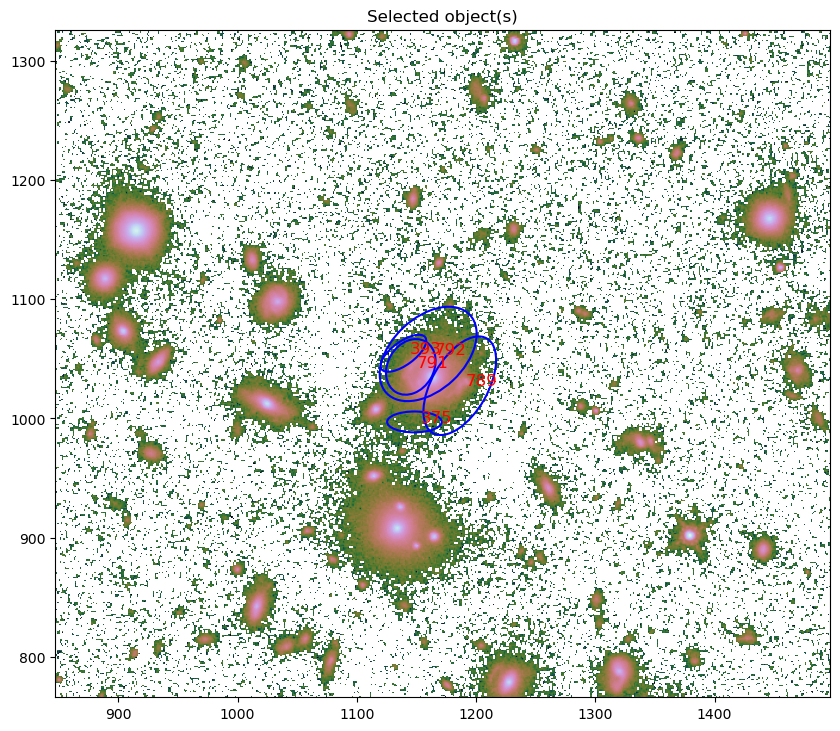

In [99]:
 # parts of the central deflector and lensed arc
id_central_2drop = [393, 792, 791, 789, 375] 
label_selected_objects(id_central_2drop)

/tmp/ipykernel_25431/745140955.py:12: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background),


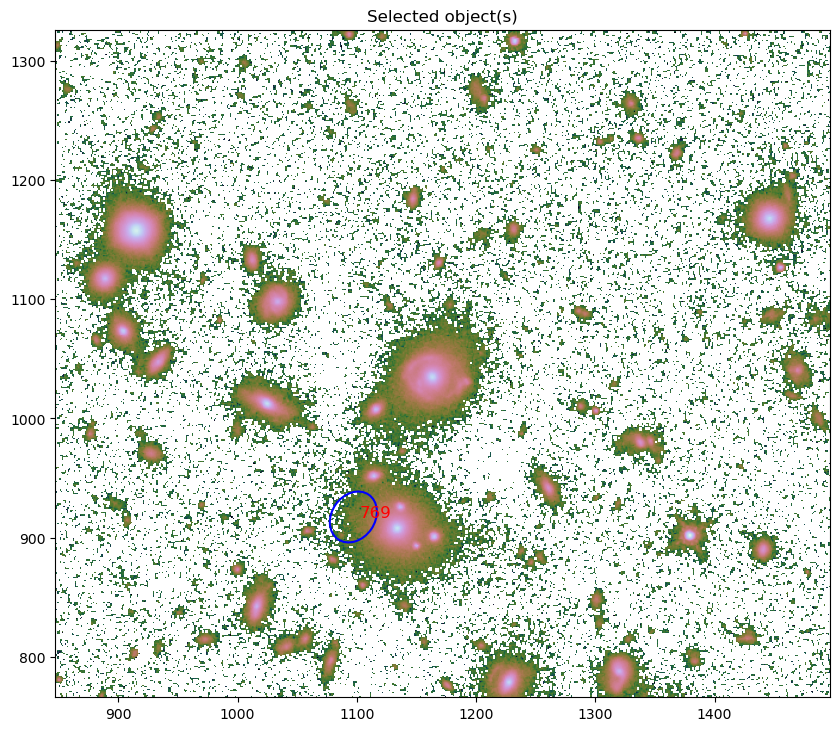

In [79]:
 # stars and other
id_others_2drop = [769] 
label_selected_objects(id_others_2drop)

20 Neighbouring Galaxies excluding central deflector, lensed arc , stars and other

In [100]:
df_all = pd.DataFrame({"Distance(pixels)": dist_galaxies_all})

df_all.set_index(pd.Index(close_galaxies_all), inplace=True)

df_all["Distance(arcsec)"] = distance_arcsec(df_all["Distance(pixels)"])
df_all["Flux"] = flux_galaxies_all
df_all["Axis Ratio"] = axis_ratios_all

# drop the central and other unwanted ids
df_all = df_all.drop(index=id_central_2drop)
# df_all = df_all.drop(index=id_others_2drop)

# Sort the DataFrame based on 'Distance'
df_all_sorted = df_all.sort_values(by="Distance(pixels)")
df_all_sys_removed = df_all_sorted

# first 20 galaxies
df_all_20 = df_all_sys_removed.iloc[:20]

print(df_all_20)

     Distance(pixels)  Distance(arcsec)         Flux  Axis Ratio
790          0.000000          0.000000  1044.573614    0.619475
392         46.983568          3.758685    19.529699    0.803669
374         52.929404          4.234352   106.767505    0.731401
419         63.867673          5.109414     6.434641    0.825256
361         65.365138          5.229211     5.138200    0.920563
418         70.594477          5.647558     4.021506    0.720744
369         88.339872          7.067190     2.059620    0.673577
771         95.040682          7.603255   108.461691    0.799265
436         97.362424          7.788994    15.236387    0.688385
372        107.814307          8.625145     5.362714    0.804520
770        109.024855          8.721988   139.946412    0.770816
346        110.538518          8.843081     3.511109    0.850340
379        127.575819         10.206066     8.771198    0.949866
445        128.193590         10.255487     6.053075    0.769353
768        128.908353    

20 Neighbouring Galaxies excluding central deflector, lensed arc , stars and other + dim sources

In [101]:
df_1 = pd.DataFrame({"Distance(pixels)": dist_galaxies_1})

df_1.set_index(pd.Index(close_galaxies_1), inplace=True)

df_1["Distance(arcsec)"] = distance_arcsec(df_1["Distance(pixels)"])
df_1["Flux"] = flux_galaxies_1
df_1["Axis Ratio"] = axis_ratios_1


# Exclude the lensing system and other undesirable members
df_1_sys_removed = df_1.drop(
    index=id_central_2drop 
)

# 638, 303, 297 already dropped as dim sources. So excluding from id_others_2drop list 
id_others_2drop_v2 = [] 
df_1_sys_and_othes_removed = df_1_sys_removed.drop(
    index=id_others_2drop_v2 
)
 

# Sort the DataFrame based on 'Distance'
df_1_sorted = df_1_sys_and_othes_removed.sort_values(by="Distance(pixels)")

# first 20 galaxies
df_1_20 = df_1_sorted.iloc[:20]

print(df_1_20)

     Distance(pixels)  Distance(arcsec)         Flux  Axis Ratio
790          0.000000          0.000000  1044.573614    0.619475
392         46.983568          3.758685    19.529699    0.803669
374         52.929404          4.234352   106.767505    0.731401
771         95.040682          7.603255   108.461691    0.799265
436         97.362424          7.788994    15.236387    0.688385
770        109.024855          8.721988   139.946412    0.770816
768        128.908353         10.312668  1049.058422    0.924462
767        132.361832         10.588947   133.264701    0.845918
769        132.973154         10.637852    28.088680    0.799946
343        134.234566         10.738765    64.541193    0.482311
373        139.213753         11.137100   415.886073    0.487092
377        140.622685         11.249815    11.876507    0.920711
766        142.398345         11.391868    77.675807    0.614627
446        143.189982         11.455199    17.732344    0.812085
410        144.952402    

## Determining $\Sigma_{10}$, $\Sigma_{10, \rm flux\ selected}$, $\Sigma_{20}$, $\Sigma_{20, \rm flux\ selected}$ and the corresponding radii

/tmp/ipykernel_25431/3053078570.py:17: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_25431/3053078570.py:20: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_25431/3053078570.py:23: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
/tmp/ipykernel_25431/3053078570.py:26: RuntimeWarning: invalid value encountered in log10
  np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2



EXCLUDING DIM SOURCES
R 10: 10.73876528361793
R 20: 14.491760124117098
Sigma 10: 0.027602055642377648
Sigma 20: 0.030313623304778735

FOR All SOURCES
R 10: 8.625144558266834
R 20: 11.137100215890753
Sigma 10: 0.0427875443261192
Sigma 20: 0.05132581659306022


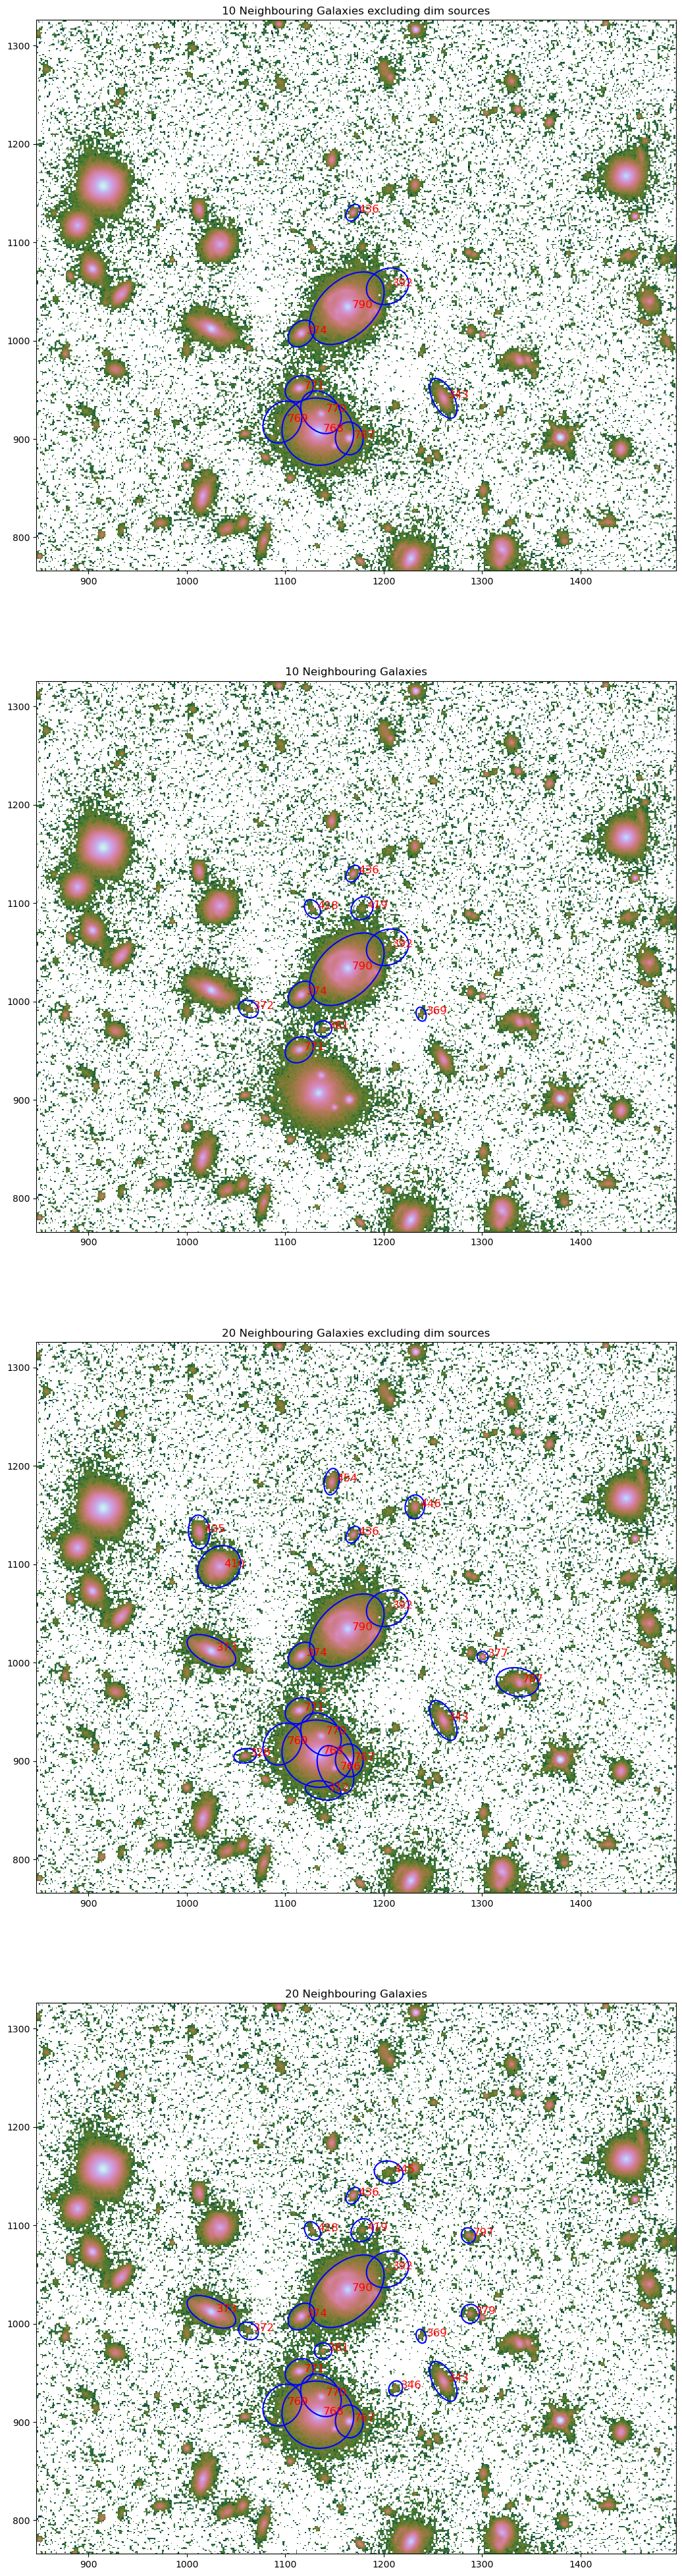

In [102]:
close_ids_all = list(df_all_20.index.values)
close_ids_all_10 = close_ids_all[:10]

updated_close_ids_all = [s + 1 for s in close_ids_all]
updated_close_ids_all_10 = updated_close_ids_all[:10]

close_ids_1 = list(df_1_20.index.values)
close_ids_1_10 = close_ids_1[:10]

updated_close_ids_1 = [s + 1 for s in close_ids_1]
updated_close_ids_1_10 = updated_close_ids_1[:10]

norm = simple_norm(data, "sqrt")
fig, axs = plt.subplots(4, 1, figsize=(25, 50))  # , figsize=(10, 12.5)

axs[0].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[1].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[2].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)
axs[3].imshow(
    np.log10(data - bkg.background), origin="lower", cmap="cubehelix", vmin=-4, vmax=2
)

cat_subset_1_10 = cat.get_labels(updated_close_ids_1_10)
cat_subset_1_10.plot_kron_apertures(ax=axs[0], color="blue", lw=1.5)

cat_subset_all_10 = cat.get_labels(updated_close_ids_all_10)
cat_subset_all_10.plot_kron_apertures(ax=axs[1], color="blue", lw=1.5)

cat_subset_all = cat.get_labels(updated_close_ids_1)
cat_subset_all.plot_kron_apertures(ax=axs[2], color="blue", lw=1.5)

cat_subset_1 = cat.get_labels(updated_close_ids_all)
cat_subset_1.plot_kron_apertures(ax=axs[3], color="blue", lw=1.5)

axs[0].set_title("10 Neighbouring Galaxies excluding dim sources")
axs[1].set_title("10 Neighbouring Galaxies")
axs[2].set_title("20 Neighbouring Galaxies excluding dim sources")
axs[3].set_title("20 Neighbouring Galaxies")

for i in close_ids_1_10:
    axs[0].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all_10:
    axs[1].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_1:
    axs[2].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

for i in close_ids_all:
    axs[3].text(cat.xcentroid[i] + 5, cat.ycentroid[i], f"{i}", c="r", fontsize=12)

axs[0].set_xlim(set_x_lim1, set_x_lim2)
axs[0].set_ylim(set_y_lim1, set_y_lim2)

axs[1].set_xlim(set_x_lim1, set_x_lim2)
axs[1].set_ylim(set_y_lim1, set_y_lim2)

axs[2].set_xlim(set_x_lim1, set_x_lim2)
axs[2].set_ylim(set_y_lim1, set_y_lim2)

axs[3].set_xlim(set_x_lim1, set_x_lim2)
axs[3].set_ylim(set_y_lim1, set_y_lim2)

# hide all text outside of the axes
axs[0].set_clip_on(True)
axs[0].set_clip_box(axs[0].bbox)

axs[1].set_clip_on(True)
axs[1].set_clip_box(axs[0].bbox)

axs[2].set_clip_on(True)
axs[2].set_clip_box(axs[0].bbox)

axs[3].set_clip_on(True)
axs[3].set_clip_box(axs[0].bbox)

R_10_1 = df_1_20.iloc[9, df_1_20.columns.get_loc("Distance(arcsec)")]
R_20_1 = df_1_20.iloc[19, df_1_20.columns.get_loc("Distance(arcsec)")]
Sigma_10_1 = 10 / (np.pi * R_10_1**2)
Sigma_20_1 = 20 / (np.pi * R_20_1**2)

R_10_all = df_all_20.iloc[9, df_all_20.columns.get_loc("Distance(arcsec)")]
R_20_all = df_all_20.iloc[19, df_all_20.columns.get_loc("Distance(arcsec)")]
Sigma_10_all = 10 / (np.pi * R_10_all**2)
Sigma_20_all = 20 / (np.pi * R_20_all**2)

print("")
print("EXCLUDING DIM SOURCES")
print("R 10:", R_10_1)
print("R 20:", R_20_1)
print("Sigma 10:", Sigma_10_1)
print("Sigma 20:", Sigma_20_1)

print("")
print("FOR All SOURCES")
print("R 10:", R_10_all)
print("R 20:", R_20_all)
print("Sigma 10:", Sigma_10_all)
print("Sigma 20:", Sigma_20_all)

## Store the $\Sigma_{10}$, $\Sigma_{10, \rm flux\ selected}$, $\Sigma_{20}$, $\Sigma_{20, \rm flux\ selected}$ values in the YAML file

In [103]:
# Existing YAML file with other parameters
existing_yaml_file = "DESIJ1554+0443_point_estimates.yml"

# Variables to include in the YAML file
environment_variables = {
    "Sigma_10": Sigma_10_all,
    "Sigma_10_flux_selected": Sigma_10_1,
    "Sigma_20": Sigma_20_all,
    "Sigma_20_flux_selected": Sigma_20_1,
}

# Load existing YAML content if the file exists
existing_content = {}
try:
    with open(existing_yaml_file, "r") as file:
        existing_content = yaml.safe_load(file)
except FileNotFoundError:
    pass

# Update the existing content with new variables
existing_content.update(environment_variables)

# Write the updated content back to the YAML file
with open(existing_yaml_file, "w") as file:
    yaml.dump(existing_content, file, default_flow_style=False)

In [104]:
# Read the YAML file using safe_load

with open(existing_yaml_file, "r") as file:
    try:
        yaml_read = yaml.safe_load(file)
        print("YAML Data:")
        print("Number of params:", len(list(yaml_read.keys())))
        print(yaml_read)
    except yaml.YAMLError as e:
        print(f"Error reading YAML file: {e}")

Error reading YAML file: could not determine a constructor for the tag 'tag:yaml.org,2002:python/object/apply:numpy.core.multiarray.scalar'
  in "DESIJ1554+0443_point_estimates.yml", line 1, column 11
